In [1]:
import pandas as pd


pd.set_option('max_colwidth', None) # Opção para exibir a largura total das colunas

# Importando os dados

O dataset de métricas possui os seguintes parâmetros:
- Data: data do boletim
- Casos suspeitos: quantidade de casos que aguardam teste e são suspeitos para o COVID-19. Valor cumulativo
- Casos confirmados: casos que foram testados e apresentaram resultado positivo para COVID-19. Valor cumulativo
- Internações UTI:número de internações na UTI
- Internações enfermaria: número de internações na enfermaria
- Altas UTI (24h): altas de internados na UTI nas últimas 24h
- Altas enfermaria (24h): altas de internados na enfermaria nas últimas 24h
- Óbitos suspeitos: óbitos em investigação por suspeita de coronavirus
- Óbitos confirmados: testes em óbitos suspeitos com resultado positivo
- Óbitos negativos: testes em óbitos suspeitos com resultado negativo
- Internações totais: número total de internações
- Internações sala de emergência: internações em salas de emergência
- Altas acumuladas UTI (desde 14/04/2020): altas de internados em UTI desde o dia 14/04
- Altas acumuladas enfermaria (desde 14/04/2020): altas de internados em enfermaria desde o dia 14/04
- Índice de ocupação UTI: porcentagem dos leitos de UTI disponíveis na cidade que estão ocupados
- Pacientes recuperados: métrica que entrou em vigor a partir do boletim do dia 01/06


In [3]:
df = pd.read_csv('dataset coronavirus uberlandia.csv', index_col='Data')

df.head(10)

,Casos suspeitos,Casos confirmados,Resultados negativos,Internações UTI,Internações enfermaria,Altas UTI (24h),Altas enfermaria (24h),Óbitos Suspeitos,Óbitos confirmados,Óbitos negativos,Internações totais,Internações sala de emergência,Altas acumuladas UTI (desde 14/04/2020),Altas acumuladas enfermaria (desde 14/04/2020),Índice de ocupação UTI,Pacientes recuperados
Data,,,,,,,,,,,,,,,,
17/03/20,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18/03/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19/03/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20/03/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21/03/20,188.0,3.0,25.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN
22/03/20,193.0,3.0,27.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN
23/03/20,225.0,7.0,41.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN
24/03/20,306.0,8.0,67.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,36.0,NaN,NaN,NaN,NaN,NaN
25/03/20,399.0,8.0,67.0,NaN,NaN,NaN,NaN,4.0,0.0,0.0,39.0,NaN,NaN,NaN,NaN,NaN


Já o dataset de ações possui 2 colunas:
- Data: data do ocorrido;
- Info: resumo do acontecimento.

In [4]:
info = pd.read_csv('acoes.csv', index_col='Data')

info.head(10)

,Info
Data,
13/03/20,Comitê de Enfrentamento ao Covid-19\nRepassa orientações
17/03/20,Primeiro caso de covid-19
18/03/20,Espaços culturais públicos fechados
19/03/20,Pocon Móvel suspenso
20/03/20,Fechamento do comércio não\nEssencial decretado
21/03/20,Parques suspensos;\nProcon tem atividades suspensas
22/03/20,Parque do Sabiá fechado e\natendimentos presenciais da\nPrefeitura suspensos
23/03/20,Início da campanha de vacinação contra a gripe\ne anúncio de reabertura do Hospital Santa \nCatarina pela prefeitura
24/03/20,Feiras livres suspensas e\nEscolas municipais fechadas


# Análise de testes
Primeiramente, vamos tentar avaliar a testagem em Uberlândia. Métricas internacionais de testagem estão sendo feitas em função de testes/milhão de habitantes. Com isso, é necessário criar uma métrica similar para Uberlândia.

Uberlândia possui uma população de 691305 pessoas segundo o [censo de 2019](https://g1.globo.com/mg/triangulo-mineiro/noticia/2019/08/29/ibge-aponta-que-uberlandia-e-a-2a-mais-populosa-de-mg-veja-situacao-das-principais-cidades-do-triangulo-alto-paranaiba-e-noroeste.ghtml). Sendo assim, é necessário criar uma nova coluna 'Testagem_por_milhao' que seja a soma dos resultados negativos e positivos multiplicada por 1 milhão / 691.305

In [5]:
df['Testagem_por_milhao'] = (df['Resultados negativos'] + df['Casos confirmados'])*(1000000/691305)

Agora, para a plotagem e comparação com a métrica de outros países:

Obs: a origem dos dados está [aqui](https://www.worldometers.info/coronavirus/#countries).

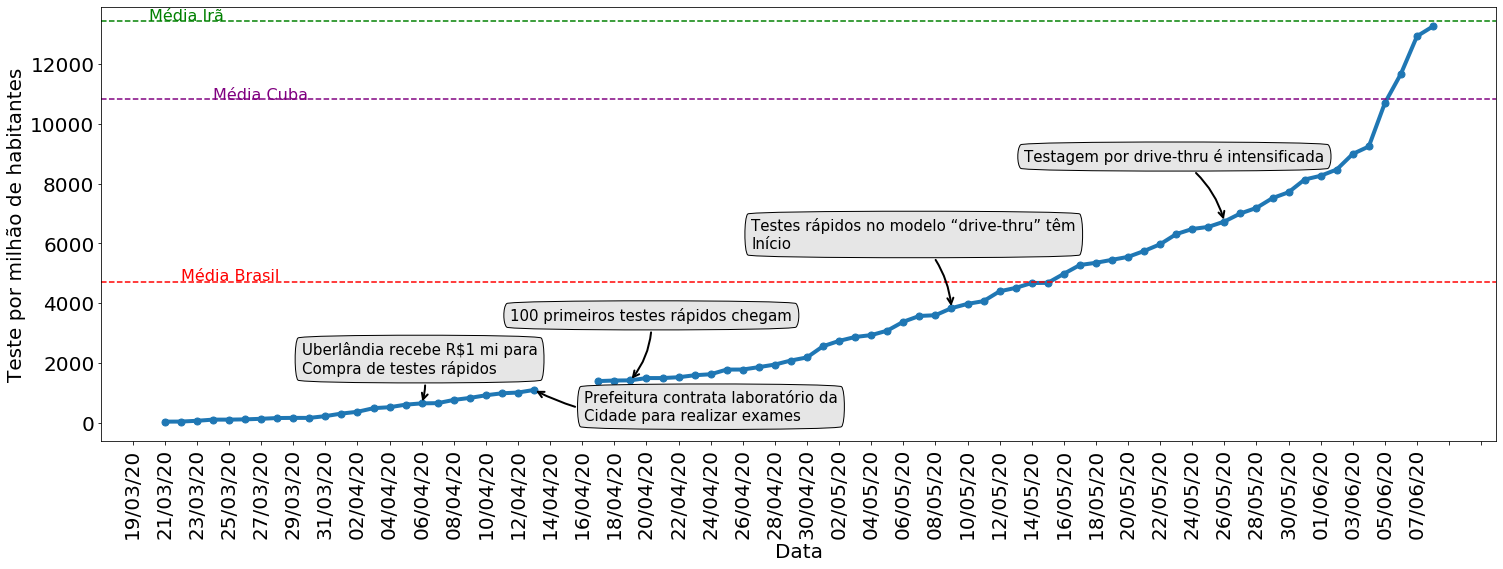

In [82]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.ticker as plticker


fig, ax = plt.subplots(figsize=(25, 8))

plt.plot(df.index, df['Testagem_por_milhao'], 'o-', linewidth=4, markersize=7)



# Labels
plt.xlabel('Data', fontsize=20)
plt.ylabel('Teste por milhão de habitantes', fontsize=20)



# Linhas que mostram médias de alguns países (próximo da média de Uberlândia). Dados de 09/06/2020
x=4706
plt.axhline(x, ls='--', color='red')
plt.text(5,x+70, "Média Brasil", fontsize=16, color='red')


x=10824
plt.axhline(x, ls='--', color='purple')
plt.text(7,x+12, "Média Cuba", fontsize=16, color='purple')


x=13448
plt.axhline(x, ls='--', color='green')
plt.text(3,x+12, "Média Irã", fontsize=16, color='green')



# Marcação de eventos importantes para a métrica
for i in [17]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Testagem_por_milhao'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(50, -30)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
    
for i in [14]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Testagem_por_milhao'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-120, 30)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [30, 37]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Testagem_por_milhao'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-200, 60)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
    
for i in [22]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Testagem_por_milhao'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-120, 60)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

    
# Configuração dos ticks
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

plt.show()

A métrica de proporção de testes positivos pode ser importante? Vamos avaliar.

Primeiramente, as colunas envolvidas neste cálculo (casos confirmados e resultados negativos) são cumulativas. Com isso, é necessário fazer um cálculo com o diferencial das colunas:

In [80]:
df['Taxa de positivos'] = df['Casos confirmados'].diff()/(df['Resultados negativos'].diff() + df['Casos confirmados'].diff())
df['Taxa de positivos']= df['Taxa de positivos'].fillna(0)

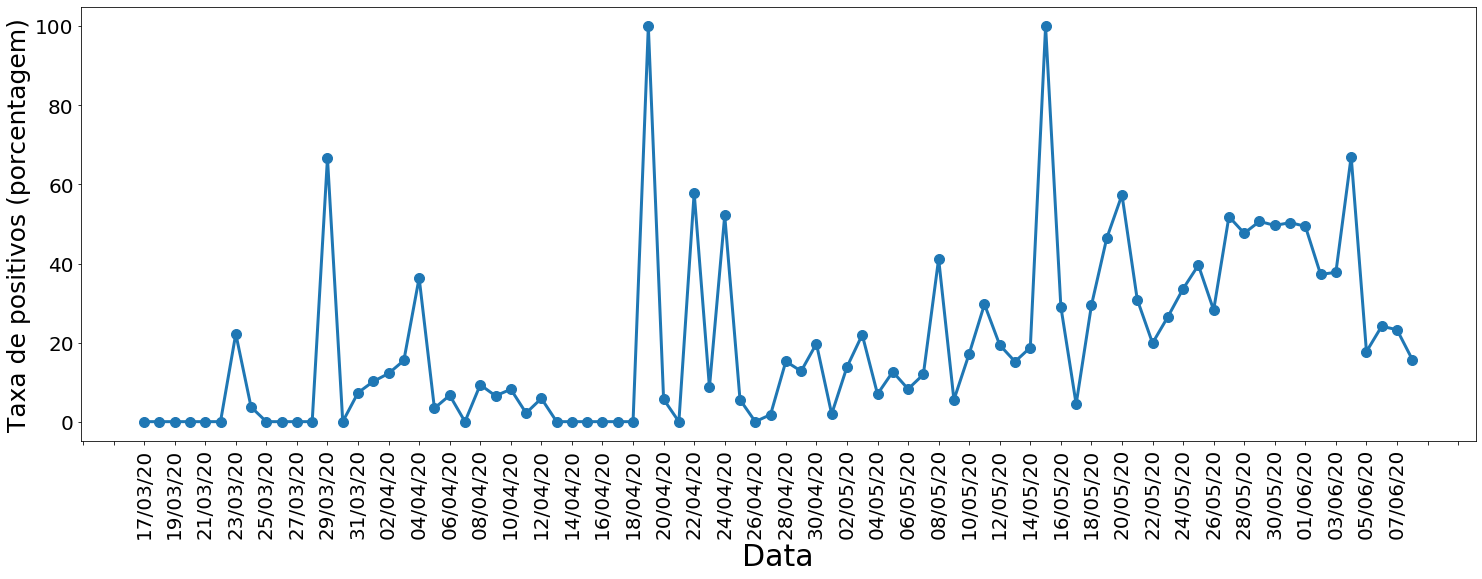

In [85]:
# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(25, 8))



p = plt.plot(df.index
                 ,df['Taxa de positivos']*100
                 ,marker="o"
                 ,linewidth=3
                 ,markersize=10)

plt.xlabel('Data', fontsize=30)
plt.ylabel('Taxa de positivos (porcentagem)', fontsize=25)


# Configuração dos ticks
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

plt.show()

## Conclusão
Como vemos, Uberlândia tem uma média de testes acima de países como Cuba e do próprio Brasil.
Além disso, é importante destacar que mesmo a média brasileira ainda está muito aquém do necessário, visto que alguns países, que estão sendo exemplos no combate ao covid-19, estão com uma testagem muito maior.

Além disso, a taxa de testes positivos em relação ao total teve uma tendência de aumento, porém variou bastante na última semana. Isso pode indicar que pelo grande volume de casos suspeitos, os quadros mais graves de síndrome respiratória (que indicam pacientes que receberam os tratameantos convencionais e não tiveram melhora) estão sendo priorizados e testados, havendo uma subnotificação de quadros mais leves e assintomáticos

# Análise de internados em UTI e enfermaria
Primeiramente vamos fazer uma análise dos valores brutos dos internados por covid-19.


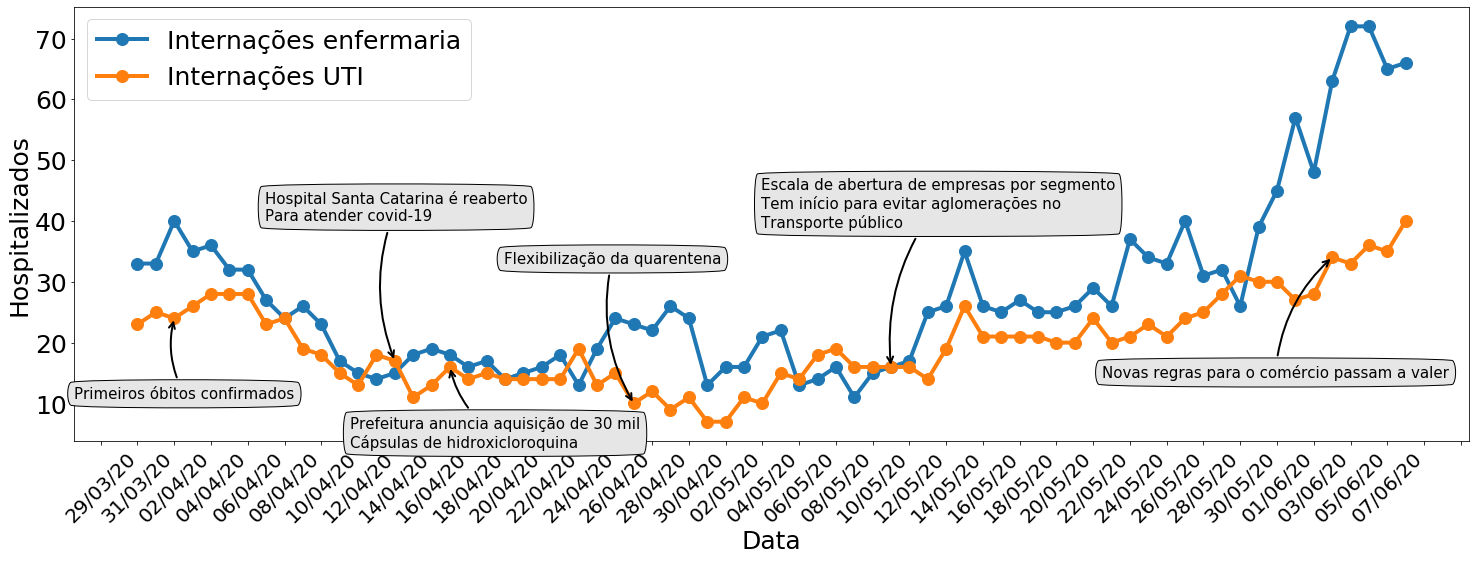

In [102]:
# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(25, 8))

plt.plot(df.index
         ,df['Internações enfermaria']
         ,marker="o"
         ,label='Internações enfermaria'
         ,linewidth=4
         ,markersize=12)

plt.plot(df.index
         ,df['Internações UTI']
         ,marker="o"
         ,label='Internações UTI'
         ,linewidth=4
         ,markersize=12)

plt.xlabel('Data', fontsize=25)
plt.ylabel('Hospitalizados', fontsize=25)

plt.legend(prop={'size': 25})



# Marcação de eventos importantes para a métrica
for i in [13, 20]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Internações UTI'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-100, -80)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
    
for i in [41]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Internações UTI'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-230, -120)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [18, 27, 31]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Internações UTI'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-130, 140)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

    
# Configuração dos ticks
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=25)

loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

plt.show()

Agora, vamos analisar a média de pessoas com covid-19 que estão com quadro grave (em UTI). Para isso, vamos plotar a porcentagem de internações na UTI em função do total de casos confirmados

In [103]:
df['Índice de gravidade'] = df['Internações UTI']/df['Casos confirmados']

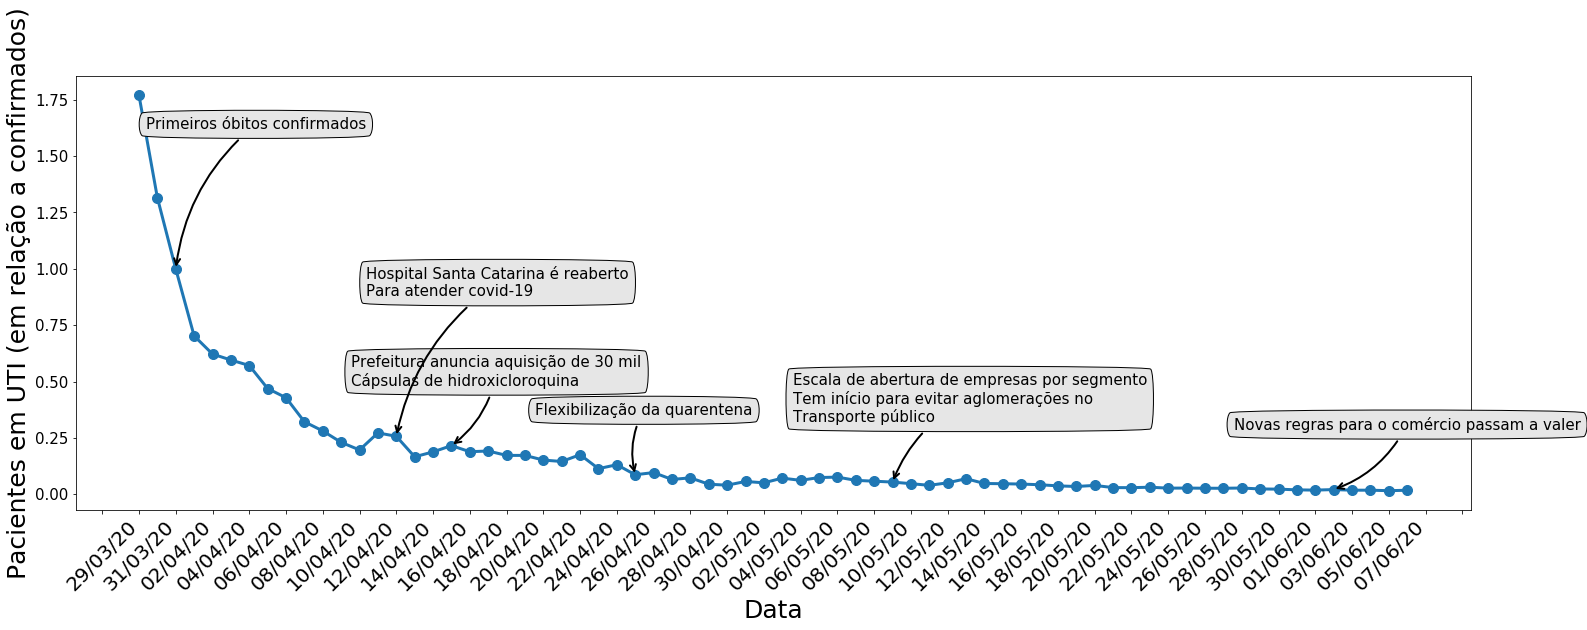

In [115]:
# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(25, 8))

plt.plot(df.index
         ,df['Índice de gravidade']
         ,marker="o"
         ,label='Internações enfermaria'
         ,linewidth=3
         ,markersize=10)

plt.xlabel('Data', fontsize=25)
plt.ylabel('Pacientes em UTI (em relação a confirmados)', fontsize=25)



# Marcação de eventos importantes para a métrica
for i in [20, 41]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Índice de gravidade'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-100, 60)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [13, 18]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Índice de gravidade'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-30, 140)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)


for i in [27, 31]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Índice de gravidade'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-100, 60)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
    
    
    
# Configuração dos ticks
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=15)

loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

plt.show()

Aqui podemos ver uma clara incongruência do dado: nos primeiros dias haviam mais pacientes internados do que casos confirmados. Isso pode indicar que o número de pacientes internados na base refere-se ao de casos suspeitos (que são provavelmente aqueles que possuem uma síndrome respiratória).

Com isso, vamos recalcular para que o índice refira-se ao número de casos suspeitos:

In [117]:
df['Índice de gravidade'] = df['Internações UTI']/df['Casos suspeitos']

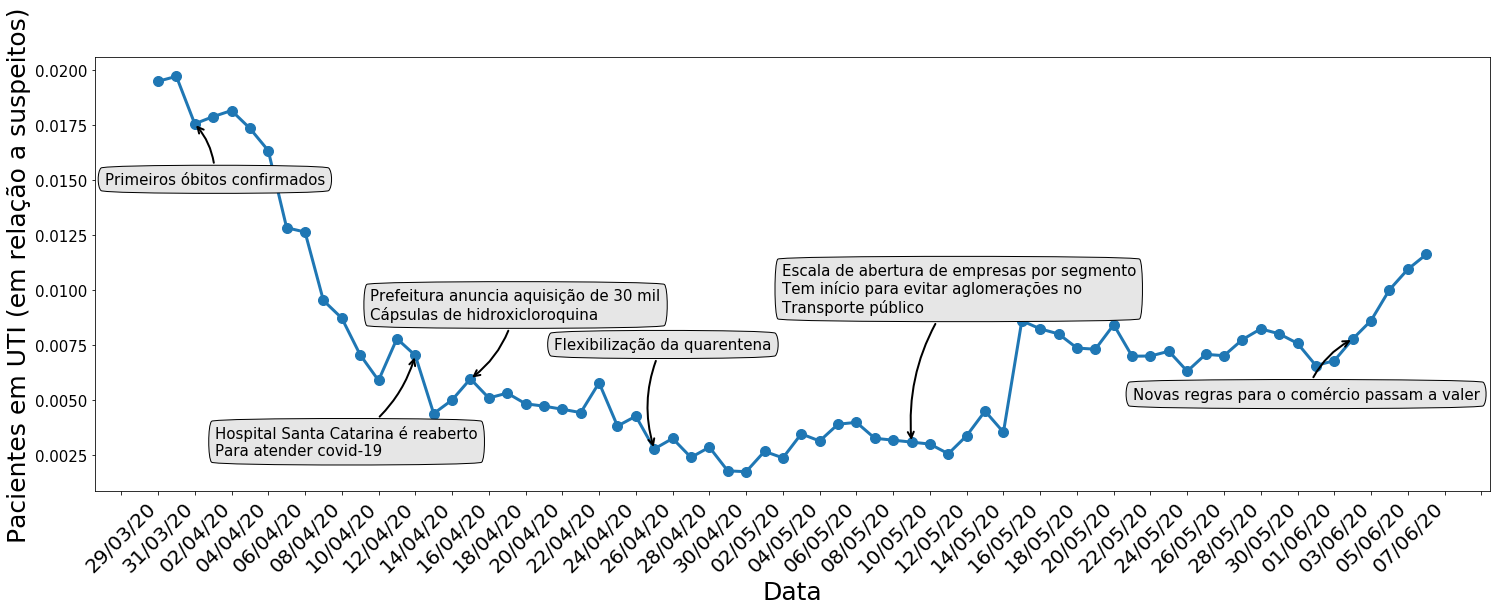

In [135]:
# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(25, 8))

plt.plot(df.index
         ,df['Índice de gravidade']
         ,marker="o"
         ,label='Internações enfermaria'
         ,linewidth=3
         ,markersize=10)

plt.xlabel('Data', fontsize=25)
plt.ylabel('Pacientes em UTI (em relação a suspeitos)', fontsize=25)



# Marcação de eventos importantes para a métrica
for i in [13]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Índice de gravidade'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-90, -60)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [18]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Índice de gravidade'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-200, -100)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [20]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Índice de gravidade'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-100, 60)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)


for i in [27]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Índice de gravidade'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-100, 100)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
    
for i in [31]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Índice de gravidade'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-130, 130)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
    
for i in [41]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Índice de gravidade'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-220, -60)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

    
    
# Configuração dos ticks
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=15)

loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

plt.show()

Por fim, vamos colocar estes valores em conjunto com o índice de ocupação de UTI.

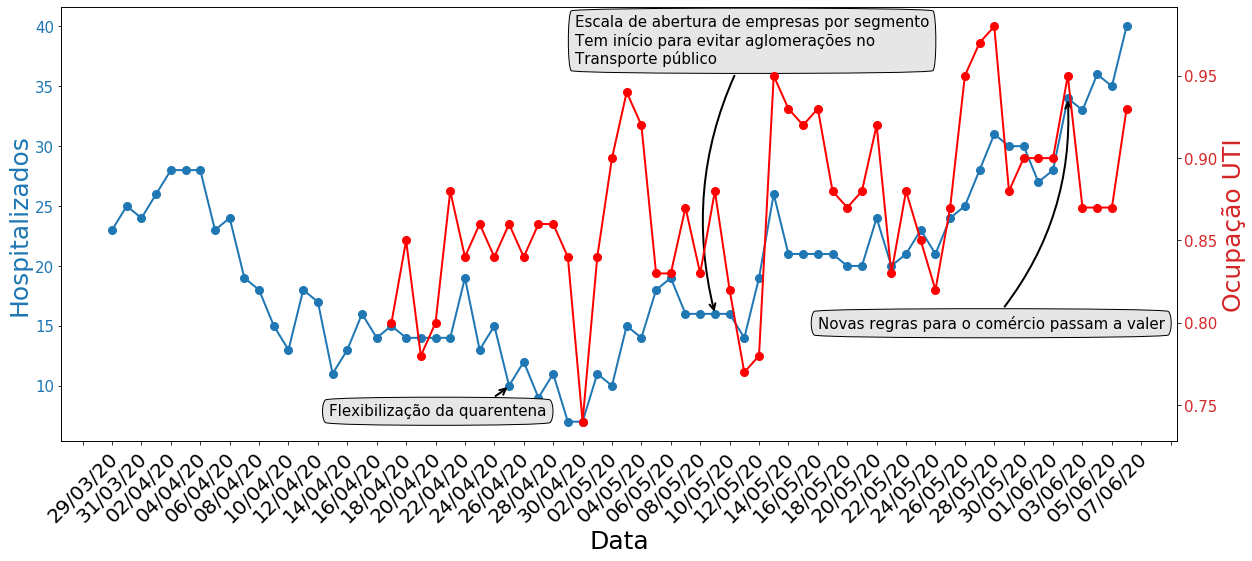

In [157]:
import datetime

# Plotagem do gráfico
fig, ax1 = plt.subplots(figsize=(20,8))

color = 'tab:blue'
ax1.plot(df.index
         ,df['Internações UTI']
         ,marker="o"
         ,label='Internações UTI'
         ,linewidth=2
         ,markersize=8)

ax1.set_xlabel('Data', fontsize=25)
ax1.set_ylabel('Hospitalizados', fontsize=25, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)


for i in [27]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Internações UTI'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-180, -30)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [31]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Internações UTI'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-140, 250)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [41]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Internações UTI'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-250, -230)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
    
    
# Configuração dos ticks
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=15)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(df.index
         ,df['Índice de ocupação UTI']
         ,marker="o"
         ,label='Ocupação UTI'
         ,linewidth=2
         ,markersize=8
         ,color='red')

ax2.set_xlabel('Data', fontsize=25)
ax2.set_ylabel('Ocupação UTI', fontsize=25, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc)

plt.show()

Análise de correlação das variáveis

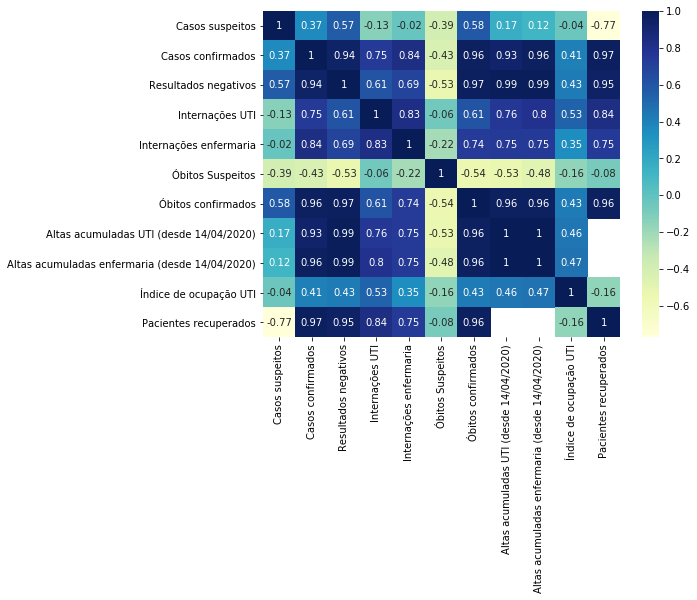

In [158]:
import seaborn as sns
plt.figure(figsize=(8,6))

sns.heatmap(df.drop(['Internações sala de emergência'
                     ,'Óbitos negativos'
                     ,'Testagem_por_milhao'
                     ,'Taxa de positivos'
                     ,'Índice de gravidade'
                     ,'Altas enfermaria (24h)'
                     ,'Altas UTI (24h)'
                     ,'Internações totais'], axis=1).corr().round(2) 
                     ,annot=True
                     ,cmap="YlGnBu")

Como vemos, o índice de ocupação da UTI flutua bastante, porém possui certa dependência do número de hospitalizados. Vemos que o índice de ocupação da UTI variou da mesma forma que o número de hospitalizados ao longo da última semana.

Além disso, validamos que o número de internações refere-se ao número total de casos suspeitos e este valor depende fortemente das medidas de isolamento decretadas, pois, após a flexibilização da quarentena, o número de casos explodiu.

## Conclusões
Conforme vimos, a aquisição das cápsulas de cloroquina podem não ter surtido o efeito desejado, visto que não houve uma diminuição do número de internações na cidade. Além disso, a reabertura do Hospital Santa Catarina surtiu algum efeito, provavelmente por causa da redistribuição dos internados, o que permitiu um desafogamento das unidades de UTI.

A taxa de internados em relação ao número de casos suspeitos é uma métrica inconclusiva, variando negativamente ao longo dos dias. Isso pode indicar que:
- Mais pessoas estão se preocupando em procurar o sistema de saúde, mesmo com sintomas leves OU
- Menos casos graves estão se desenvolvendo ao longo do tempo.

Além disso, vemos que, apesar de ser só uma entre várias causas que levam a internação em leitos de UTI, as síndromes respiratórias são uma parcela significativa do total de pacientes internados, visto que, entre os dias 22 e 23 de abril, 5 novos pacientes com síndrome respiratória a mais causaram um aumento de 84% para 86% no índice de ocupação das UTIs no dia posterior.

Por fim, hoje entramos em uma nova fase de flexibilização da quarentena. Os dados dos próximos dias podem indicar se esta foi uma escolha certa ou não.

# Análise de recuperados
Na métrica de recuperados, temos 2 variáveis: a média acumulada e o número em 24 horas. Para avaliar, vamos considerar o número de altas em 24 horas.

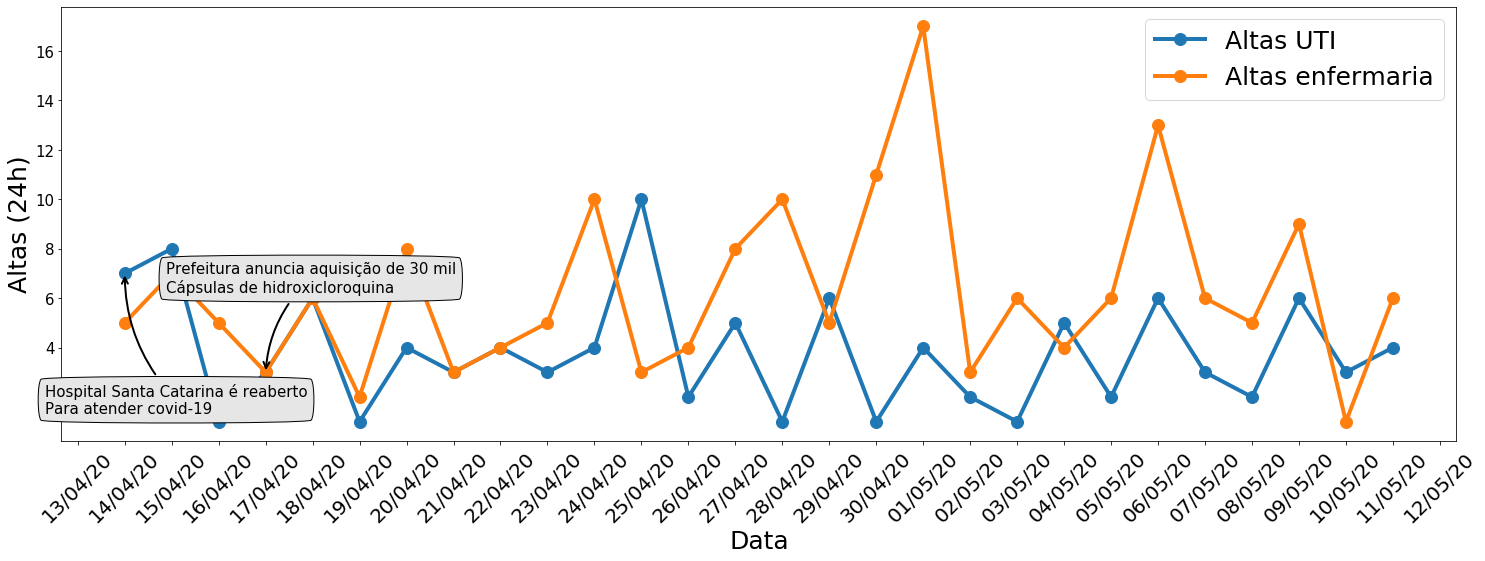

In [22]:
import datetime

# Plotagem do gráfico
plt.figure(figsize=(25, 8))

plt.plot(df.index
         ,df['Altas UTI (24h)']
         ,marker="o"
         ,label='Altas UTI'
         ,linewidth=4
         ,markersize=12)

plt.plot(df.index
         ,df['Altas enfermaria (24h)']
         ,marker="o"
         ,label='Altas enfermaria'
         ,linewidth=4
         ,markersize=12)

plt.xlabel('Data', fontsize=25)
plt.ylabel('Altas (24h)', fontsize=25)

plt.legend(prop={'size': 25})



# Configuração dos ticks
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=15)



# Marcação de eventos importantes para a métrica
for i in [18]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Altas UTI (24h)'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-80, -140)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [20]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Altas UTI (24h)'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-100, 80)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in []:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Altas UTI (24h)'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-60, 40)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

# Análise de casos suspeitos e confirmados
Como os casos suspeitos e confirmados estão evoluindo ao longo do tempo? Vamos construir uma linha temporal e avaliar

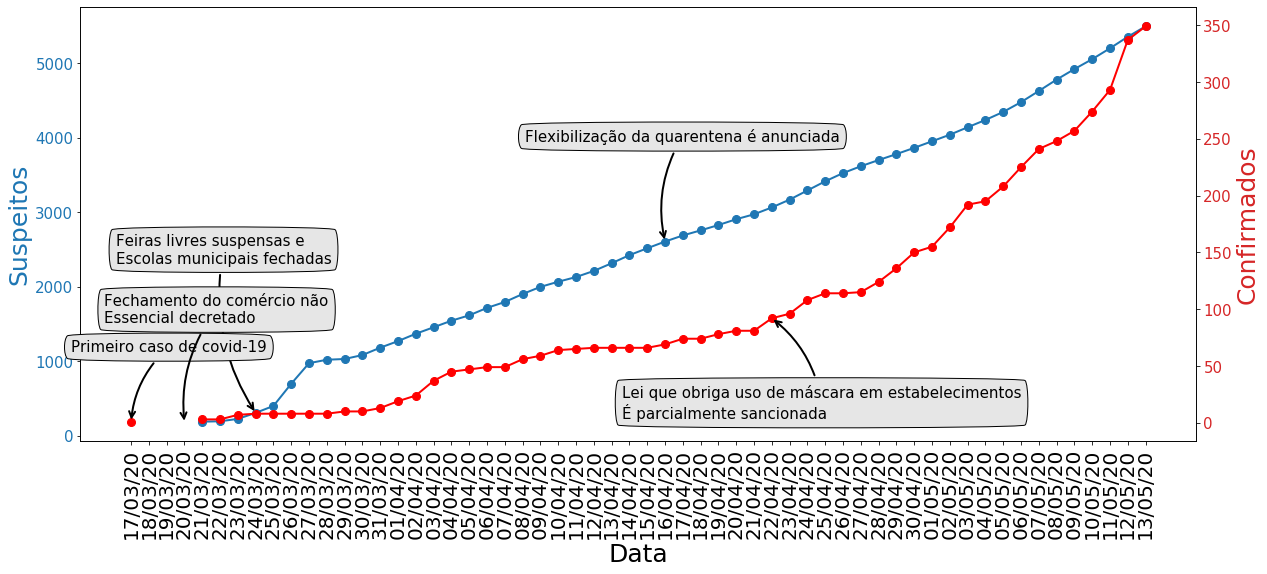

In [23]:
import datetime

# Plotagem do gráfico
fig, ax1 = plt.subplots(figsize=(20,8))

color = 'tab:blue'
ax1.plot(df.index
         ,df['Casos suspeitos']
         ,marker="o"
         ,label='Casos suspeitos'
         ,linewidth=2
         ,markersize=8)

ax1.set_xlabel('Data', fontsize=25)
ax1.set_ylabel('Suspeitos', fontsize=25, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)



# Marcação de eventos importantes para a métrica
for i in []:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Casos suspeitos'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-220, -170)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
for i in [19]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Casos suspeitos'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-140, 100)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
    
for i in [8]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Casos suspeitos'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-140, 150)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

    
    
# Configuração dos ticks
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=15)



# Segunda plotagem
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(df.index
         ,df['Casos confirmados']
         ,marker="o"
         ,label='Confirmados'
         ,linewidth=2
         ,markersize=8
         ,color='red')

ax2.set_xlabel('Data', fontsize=25)
ax2.set_ylabel('Confirmados', fontsize=25, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)



# Marcação de eventos importantes para a métrica
for i in [1]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Casos confirmados'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-60, 70)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [4]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), 0)
                ,xycoords='data'
                ,xytext=(-80, 100)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)

for i in [24]:
    plt.annotate(info['Info'][i]
                ,xy=(datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y'), df['Casos confirmados'][datetime.datetime.strptime(info.index[i], '%d/%m/%y').strftime('%d/%m/%y')])
                ,xycoords='data'
                ,xytext=(-150, -100)
                ,textcoords='offset points'
                ,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", linewidth=2)
                ,bbox=dict(boxstyle="round4,pad=.5", fc="0.9")
                ,size=15)
    
    
plt.show()

Como vemos, nos primeiros 7 dias após a decretação do comércio não essencial a curva de casos suspeitos teve um crescimento próximo ao exponencial, enquanto após isso houve uma linha com crescimento linear. De acordo com a [Fiocruz](https://portal.fiocruz.br/pergunta/qual-e-o-tempo-de-incubacao-do-novo-coronavirus) o período de encubação (tempo entre a infecção do ser humano pelo vírus e o início dos sintomas da doença) tem uma média de 5 dias.

Além disso, 8 dias após esta inflexão na reta, vemos que houve também uma inflexão no número de casos confirmados. Em resumo: 7 dias após a quarentena, tivemos um indício do achatamento da curva de casos suspeitos e, 8 dias após isso, um achatamento na curva de casos confirmados

Isso pode indicar de fato que a quarentena surtiu um efeito e conseguiu atrasar o surgimento de novos casos.

Porém quanto? Para isso, vamos fazer uma linha de tendência da curva de casos suspeitos entre os dias 21 e 31 de março

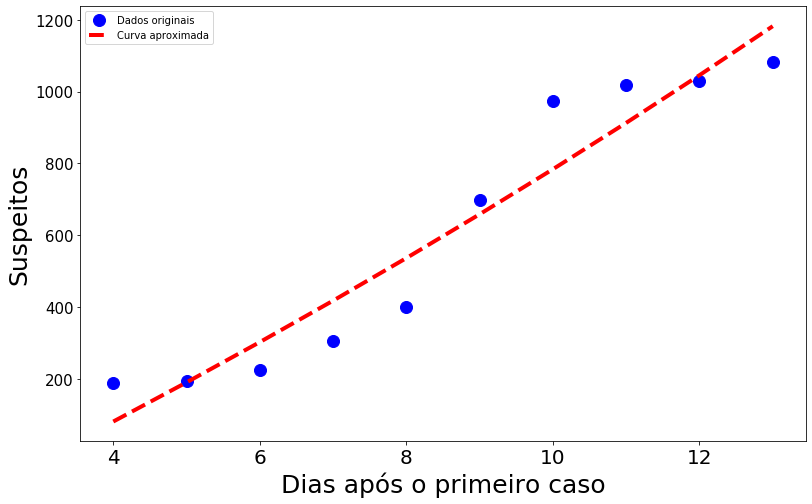

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import datetime



# Cópia do dataframe
df2 = df.copy()
df2.reset_index() # Reset do index
df2['Data'] = range(0, len(df2)) # Reconfiguração da data para que passe a contar em dias após o primeiro caso confirmado



# Variáveis para regressão
y = df2['Casos suspeitos'][4:14]
x = df2['Data'][4:14]



# Regressão da função para os dados
def func(x, a, b, c): # Função de regressão do tipo exponencial
    return a * np.exp(b * x) + c

# Regressão
popt, pcov = curve_fit(func, x, y, maxfev=10000)



# Plotagem dos dados
plt.figure(figsize=(13,8))
plt.plot(x, y, 'bo', label="Dados originais",markersize=12)
plt.plot(x, func(x, *popt), 'r--', label="Curva aproximada", linewidth=4)
plt.xlabel('Dias após o primeiro caso', fontsize=25)
plt.ylabel('Suspeitos', fontsize=25)
plt.legend()



# Configuração dos ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.show()

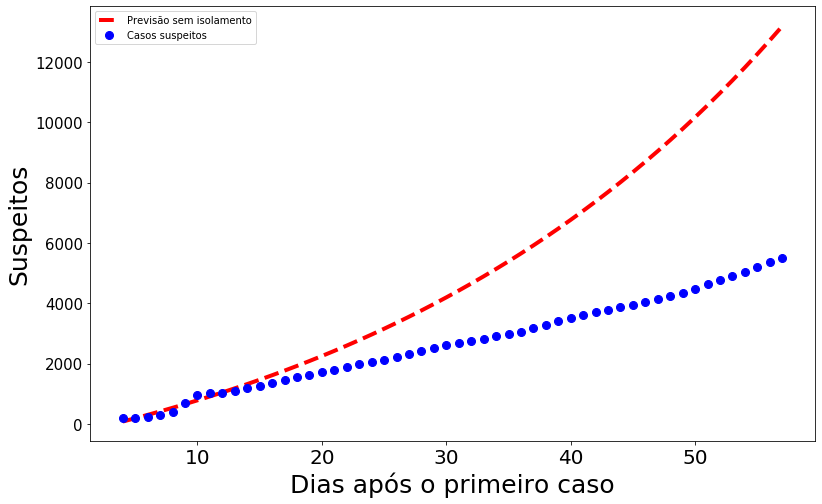

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import datetime



# Reconfigurando o y e o x para o resto da curva
y = df2['Casos suspeitos'][4:]
x = df2['Data'][4:]



# Plotagem dos dados
plt.figure(figsize=(13,8))
plt.plot(x, func(x, *popt), 'r--', label="Previsão sem isolamento", linewidth=4)
plt.plot(x, y, 'bo', label="Casos suspeitos", markersize=8)
plt.legend()
plt.xlabel('Dias após o primeiro caso', fontsize=25)
plt.ylabel('Suspeitos', fontsize=25)



# Configuração dos ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plt.show()

Como podemos ver, caso continuássemos a seguir a tendência dos primeiros dias, hoje estaríamos lidando com um número absurdamente maior de suspeitos.

Fazendo a mesma análise para o número de casos confirmados, teremos:

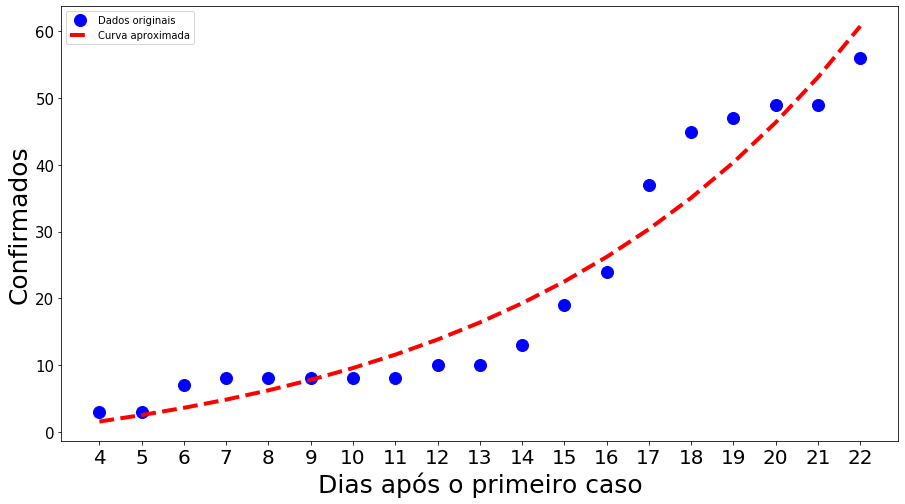

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import datetime



# Variáveis para regressão
y = df2['Casos confirmados'][4:23]
x = df2['Data'][4:23]



# Regressão da função para os dados
def func(x, a, b, c):
    return a * np.exp(b * x) + c



# Regressão
popt, pcov = curve_fit(func, x, y, maxfev=10000)



# Plotagem dos dados
plt.figure(figsize=(15,8))
plt.plot(x, y, 'bo', label="Dados originais",markersize=12)
plt.plot(x, func(x, *popt), 'r--', label="Curva aproximada", linewidth=4)
plt.xlabel('Dias após o primeiro caso', fontsize=25)
plt.ylabel('Confirmados', fontsize=25)
plt.legend()



# Configuração dos ticks
plt.xticks(range(4,23,1), fontsize=20)
plt.yticks(fontsize=15)
plt.show()

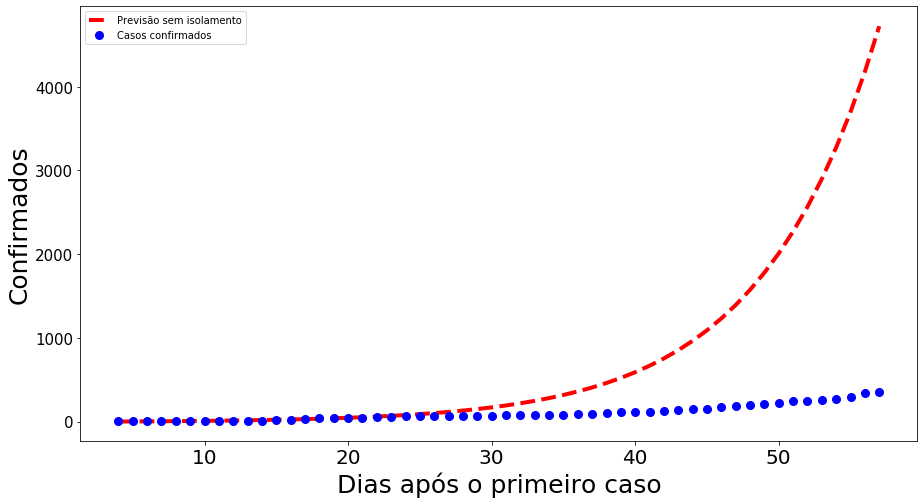

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import datetime



# Reconfigurando o y e o x para o resto da curva
y = df2['Casos confirmados'][4:]
x = df2['Data'][4:]



# Plotagem dos dados
plt.figure(figsize=(15,8))
plt.plot(x, func(x, *popt), 'r--', label="Previsão sem isolamento", linewidth=4)
plt.plot(x, y, 'bo', label="Casos confirmados", markersize=8)
plt.legend()
plt.xlabel('Dias após o primeiro caso', fontsize=25)
plt.ylabel('Confirmados', fontsize=25)



# Configuração dos ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)



plt.show()

Caso continuássemos a seguir a tendência vista no crescimento exponencial dos primeiros 22 dias, hoje poderíamos estar lidando com um número muitas vezes maior de casos confirmados.

# Linha do tempo de Uberlândia

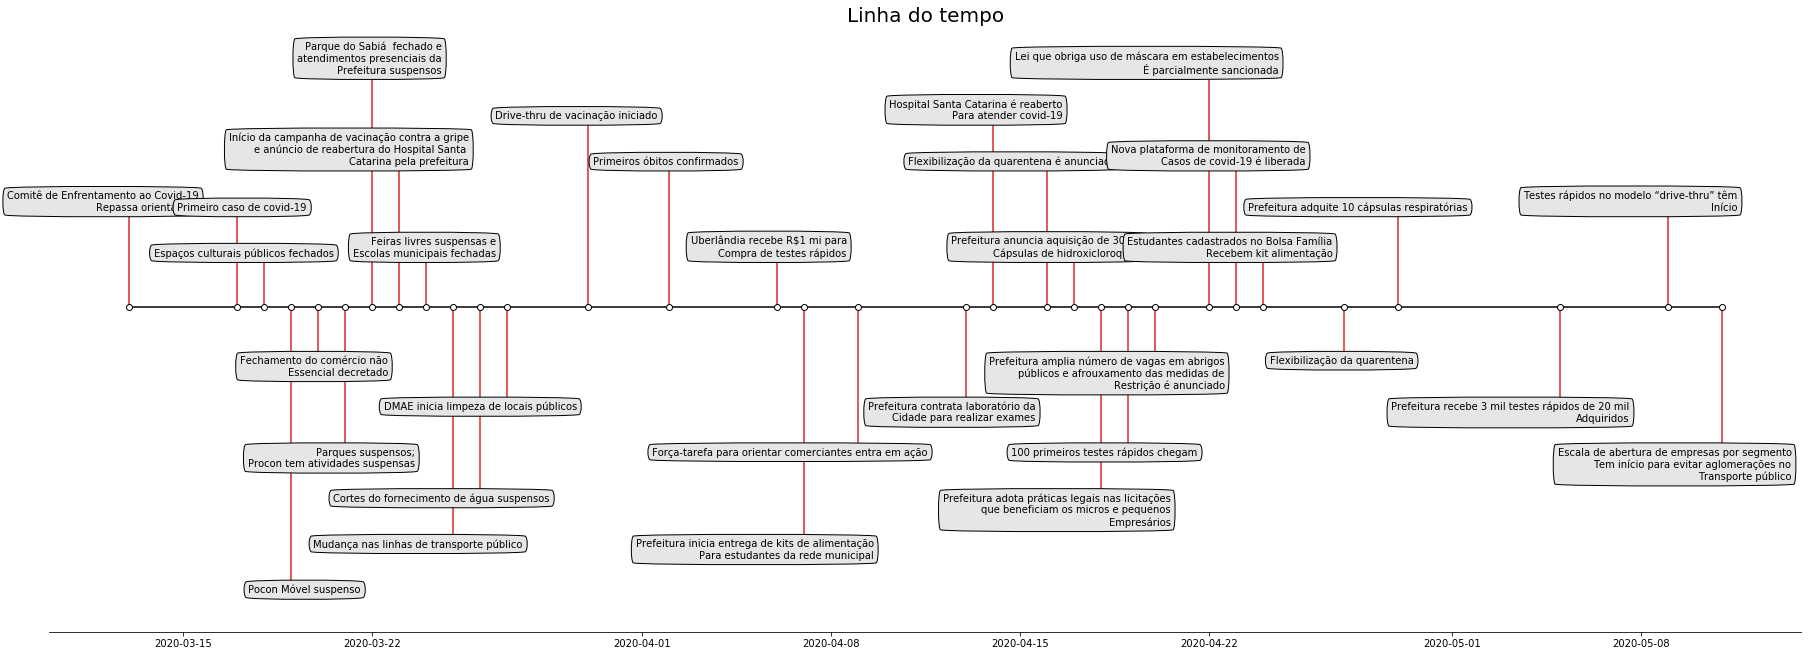

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

dates = [datetime.strptime(d, "%d/%m/%y") for d in info.index]
names = info['Info']

# Choose some nice levels
levels = np.array([2, 2, 1, -6, -1, -3,5, 3, 1, -5, -4, -2,4, 3, 1, -5, -3, -2,4, 3, 1, -4, -3, -1,5, 3, 1, -1,2,-2,2,-3])

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(25, 9), constrained_layout=True)
ax.set(title="Linha do tempo")
plt.title("Linha do tempo", fontsize=20)

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(70, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right",size=10,bbox=dict(boxstyle="round4,pad=.5", fc="0.9"))

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.savefig('timeline', dpi=300)
plt.show()